### MODUL I: HISTOGRAM, KONVOLUSI & OPERASI DASAR CITRA

### IMPORT LIBRARY

In [74]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Baris kode di atas merupakan bagian dari import library yang digunakan dalam program ini. Library numpy digunakan untuk komputasi numerik dan manipulasi array multidimensi. Library openCV digunakan untuk filter, transformasi, dan penggabungan gambar. Library matplotlib untuk membuat visualisasi data seperti grafik, plot, dan diagram.

### Membaca dan Menampilkan Citra Asli

Citra "aang.jpg" dibaca menggunakan fungsi plt.imread() dari library Matplotlib yang akan menghasilkan representasi citra dalam bentuk array NumPy. Setelah dibaca, citra tersebut ditampilkan menggunakan fungsi plt.imshow() yang juga berasal dari library Matplotlib. Fungsi ini memungkinkan citra digital ditampilkan dalam sebuah jendela gambar, sehingga dapat dilihat secara visual.

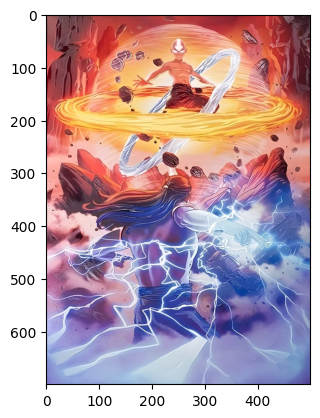

In [75]:
image = plt.imread('images/aang.jpg')
plt.imshow(image)

### Mengubah dan Menampilkan Citra Menjadi Grayscale

Untuk mengubah citra warna menjadi citra skala abu-abu dapat menggunakan fungsi cv.cvtColor() dari openCV. Kemudian untuk menampilkannya dalam plot dapat menggunakan plt.imshow() dengan skala abu-abu yang ditentukan oleh parameter cmap='gray'.

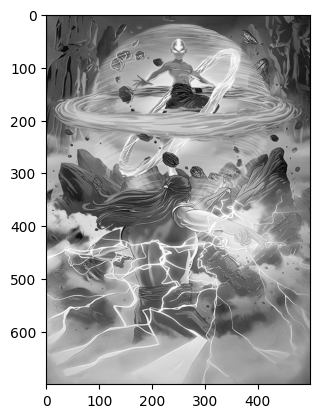

In [76]:
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

### Melakukan Clipping

Baris kode di bawah ini digunakan untuk memastikan bahwa setiap nilai piksel dalam rentang yang valid, yaitu antara 0 dan 255. Jika nilai piksel kurang dari 0 nilainya akan menjadi 0 dan jika nilai piksel lebih besar dari 255 maka akan menjadi 255.

In [77]:
height = gray_img.shape[0]
width = gray_img.shape[1]

for i in range(height):
    for j in range(width):
        if gray_img[i][j] < 0:
            gray_img[i][j] = 0
        elif gray_img[i][j] > 255:
            gray_img[i][j] = 255
        else:
            gray_img[i][j] = gray_img[i][j]

gray_img

array([[156, 110, 123, ...,  17,  25,  14],
       [151, 102, 114, ...,  26,  35,  21],
       [149,  97, 110, ...,  31,  42,  24],
       ...,
       [161, 144, 143, ...,  95,  95,  96],
       [161, 144, 144, ...,  95,  95,  95],
       [162, 146, 146, ...,  94,  94,  94]], dtype=uint8)

### Melakukan Normalisasi

Melakukan normalisasi citra skala abu-abu ke rentang 0 hingga 1 dengan mengurangkan nilai minimum dan membagi hasilnya dengan selisih nilai masimum dan minimum. Hasilnya disimpan dalam normalized_image dan kemudian ditampilkan dalam bentuk matriks. Langkah ini bertujuan untuk memastikan intensitas piksel dalam citra terdistribusi secara seragam.

In [78]:
min_value = np.min(gray_img)
max_value = np.max(gray_img)

normalized_image = (gray_img-min_value)/(max_value-min_value)
print(normalized_image)

[[0.60714286 0.42460317 0.47619048 ... 0.05555556 0.08730159 0.04365079]
 [0.58730159 0.39285714 0.44047619 ... 0.09126984 0.12698413 0.07142857]
 [0.57936508 0.37301587 0.42460317 ... 0.11111111 0.1547619  0.08333333]
 ...
 [0.62698413 0.55952381 0.55555556 ... 0.36507937 0.36507937 0.36904762]
 [0.62698413 0.55952381 0.55952381 ... 0.36507937 0.36507937 0.36507937]
 [0.63095238 0.56746032 0.56746032 ... 0.36111111 0.36111111 0.36111111]]


### Menampilkan Jumlah Intensitas Setiap Indeks

Baris kode di bawah ini digunakan untuk menghitung jumlah intensitas setiap indeks dalam citra skala abu-abu. Ini dilakukan dengan membuat array kosong dengan panjang 256(piksel dari 0-255) dan tipe data integer, kemudian melakukan iterasi melalui setiap piksel dalam citra dan mengincrementasi elemen array sesuai dengan nilai piksel yang ditemukan.

In [79]:
sumGray = np.zeros(256).astype(int)
for i in range (height):
    for j in range (width):
        grayValue = gray_img[i,j]
        sumGray[grayValue] += 1
print(sumGray)

[   0    0    0   11   22   29   59   76   59   73   68   73   92   77
  110  103  159  127  130  162  171  163  157  147  146  150  143  168
  191  249  348  362  401  412  360  375  389  400  396  406  484  430
  482  473  538  502  589  584  614  592  620  635  636  662  680  819
  772  900  916  943 1066 1100 1142 1183 1273 1282 1207 1189 1140 1242
 1491 1756 1787 1930 1881 1894 2034 2083 2180 2174 2128 2059 1966 1942
 1893 1810 1774 1773 1848 1891 1830 1764 1744 1743 1749 1717 1833 1938
 1744 1732 1788 1829 1869 1859 1664 1715 1787 1727 1754 1767 1881 1813
 1900 1811 1843 1811 1810 1784 1757 1845 1758 1681 1712 1752 1724 1717
 1734 1723 1647 1630 1781 1646 1679 1757 1793 1724 1791 1876 1971 1948
 2109 2034 2081 2079 2157 2129 2182 2059 2143 2203 2221 2204 2269 2445
 2404 2359 2277 2557 2670 2690 2636 2607 2768 2709 2767 2953 2752 2708
 2622 2671 2592 2497 2534 2478 2643 2654 2540 2556 2467 2394 2529 2463
 2606 2672 2411 2481 2564 2436 2509 2483 2168 2146 2167 2026 1807 1705
 1653 

### Menampilkan Histogram Setelah Normalisasi

grayIndex yang berisi nilai-nilai piksel dari 0 sampai 255. Selanjutnya menggunakan plt.bar() untuk membuat histogram dengan grayIndex sebagai sumbu x dan sumGray/(height*width) sebagai sumbu y/

Text(0, 0.5, 'Normalized Frequency')

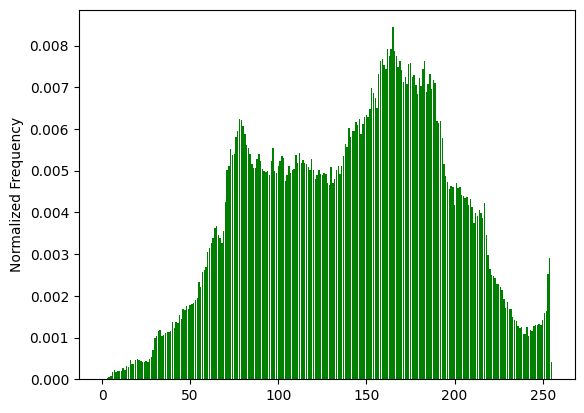

In [83]:
grayIndex = [i for i in range (256)]
plt.bar(grayIndex, sumGray/(height*width), color="green")
plt.ylabel("Normalized Frequency")

### Membuat dan Menampilkan Kernel

Baris kode di bawah ini digunakan untuk mendefinisikan sebuah kernel 4x4. Kernel ini digunakan untuk proses pengolahan citra seperti konvolusi. print(kernel) untuk melihat nilai-nilai matriks dan tinggi, lebar untuk menginisialisasi dimensi dari kernel dengan menggunakan fungsi shape.

In [ ]:
kernel = np.array([
    [1, 2, -1, 1],
    [0, 2, 1, 2],
    [2, 1, 1, 0],
    [1, 0, -1, 0]
])

print(kernel)
tinggi,lebar=kernel.shape

[[ 1  2 -1  1]
 [ 0  2  1  2]
 [ 2  1  1  0]
 [ 1  0 -1  0]]


### Membuat Konvolusi dengan Zero Padding

Membuat matriks nol baru untuk menampung hasil dari operasi konvolusi. Kemudian, citra skala abu-abu diperluas dengan menambahkan tepi piksel nol di sekelilingnya menggunakan fungsi np.pad() sehingga ukurannya meningkat sebesar 1 piksel di setiap sisi. Citra yang telah diperbesar disimpan dalam variabel imagepad dan menampilkannya menggunakan print(imagepad).

In [ ]:
konvolusi = np.zeros((height-tinggi+1, width-lebar+1))
imagepad = np.pad(gray_img, 1)
print(imagepad)

[[  0   0   0 ...   0   0   0]
 [  0 156 110 ...  25  14   0]
 [  0 151 102 ...  35  21   0]
 ...
 [  0 161 144 ...  95  95   0]
 [  0 162 146 ...  94  94   0]
 [  0   0   0 ...   0   0   0]]


### Menampilkan Hasil Konvolusi dengan Zero Padding

Melakukan operasi konvolusi antara citra yang telah diperluas dengan kernel sebelumnya. Proses ini dilakukan dengan iterasi melalu setiap piksel dalam matriks hasil konvolusi, lalu untuk setiap piksel, mengalikan bagian citra yang sesuai dengan ukuran kernel dengan kernel itu sendiri dan menjumlahkan hasilnya. Kemudian menampilkannya menggunakan perintah print(kovolusi).

In [ ]:
y = konvolusi.shape[0]
x = konvolusi.shape[1]

for i in range(y):
    for j in range(x):
        konvolusi[i][j] = np.sum(imagepad[i:i+tinggi, j:j+lebar] * kernel)
print(konvolusi)

[[ 824. 1142. 1024. ...  227.  219.  228.]
 [1108. 1460. 1312. ...  341.  331.  351.]
 [1083. 1418. 1260. ...  376.  369.  387.]
 ...
 [1239. 1812. 1737. ... 1181. 1174. 1168.]
 [1234. 1810. 1736. ... 1168. 1163. 1149.]
 [1236. 1810. 1736. ... 1158. 1154. 1146.]]


### Menampilkan Histogram Setelah di Konvolusi

Iterasi dilakukan pada setiap piksel dalam matriks hasil konvolusi dan pengkondisian di dalam iterasi digunakan untuk menentukan mana yang titik gelap dan titik terang. Kemudian menampilkan sebagai citra skala abu-abu menggunakan plt.imshow() dengan peta warna "gray".

[[1444. 1444. 1444. ... 1444. 1444. 1444.]
 [1444. 1460. 1444. ... 1444. 1444. 1444.]
 [1444. 1444. 1444. ... 1444. 1444. 1444.]
 ...
 [1444. 1555. 1555. ... 1444. 1444. 1444.]
 [1444. 1555. 1555. ... 1444. 1444. 1444.]
 [1444. 1555. 1555. ... 1444. 1444. 1444.]]


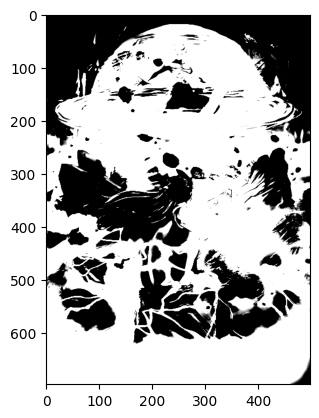

In [ ]:
for i in range(y):
    for j in range(x):
        if(konvolusi[i][j] < 1444):
            konvolusi[i][j] = 1444
        elif(konvolusi[i][j] > 1555):
            konvolusi[i][j] = 1555

        else:
            konvolusi[i][j] = konvolusi[i][j]

print(konvolusi)
plt.imshow(konvolusi, cmap="gray")

### Melakukan Rotasi 40 deg Searah Jarum Jam

Melakukan rotasi citra skala abu-abu sebesar -40 derajat karena searah jarum jam. Proses dilakukan dengan mengiterasi setiap piksel dalam matriks hasil rotasi dan menghitung koordinat baru setelah rotasi menggunakan persamaan transformasi geometri. Setelah itu, nilai piksel pada posisi baru diambil dari citra asli dan disimpan dalam matriks hasil rotasi dan menampilkannya menggunakan plt.imshow() dengan peta warna gray.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


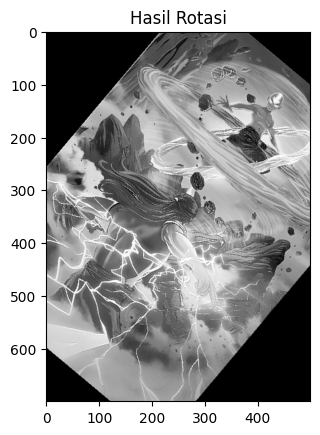

In [ ]:
rotasi = np.zeros((height, width)).astype(int)
sudut = np.deg2rad(-40)
cos = np.cos(sudut)
sin = np.sin(sudut)

tinggi_tengah = int((height-1)/2)
lebar_tengah = int((width-1)/2)

for i in range(rotasi.shape[0]):
    for j in range (rotasi.shape[1]):
        X=(i-tinggi_tengah)*cos + (j-lebar_tengah)* sin
        Y=-(i-tinggi_tengah)*sin + (j-lebar_tengah)*cos
        X = int(X + tinggi_tengah)
        Y = int(Y + lebar_tengah)
        if X>=0 and Y>=0 and X<rotasi.shape[0] and Y<rotasi.shape[1]:
            rotasi[i][j] = gray_img[X][Y]
plt.title("Hasil Rotasi")
plt.imshow(rotasi, cmap="gray")
print(rotasi)

### Melakukan Translasi Sejauh x = -163 dan y = 300

Melakukan translasi citra hasil rotasi sebesar x = -163 piksel dan y = 300 piksel. Proses translasi dilakukan dengan mengiterasi setiap piksel dalam matriks hasil rotasi dan menyalin nilainya ke posisi baru dalam matriks hasil translasi. Setelah selesai ditampilkan menggunakan plt.imshow() dengan peta warna gray.

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [141, 246, 251, ...,   0,   0,   0],
       [245, 254, 249, ...,   0,   0,   0],
       [251, 247, 247, ...,   0,   0,   0]])

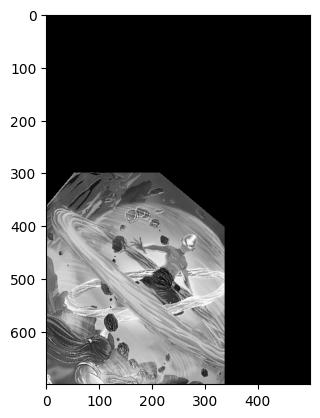

In [ ]:
x_trans = -163
y_trans = 300
translasi = np.zeros((height, width)).astype(int)
for i in range(rotasi.shape[0]):
    for j in range(rotasi.shape[1]):
        if i+y_trans >= 0 and i+y_trans < height and j + x_trans >= 0 and j + x_trans < width:
            translasi[i+y_trans][j+x_trans] = rotasi[i][j]
plt.imshow(translasi, cmap="gray")
translasi


### Melakukan Pencerminan terhadap Sumbu Y

Proses pencerminan terhadap sumbu y dilakukan dengan mengiterasi setiap piksel dalam citra hasil translasi. Saat melakukan iterasi, nilai piksel dari citra hasil translasi dipindahkan ke posisi baru dalam hasil pencerminan yang mencerminkan citra asli terhadap sumbu y. Misalnya piksel pada posisi (i, j) dalam citra hasil translasi akan dipindahkan ke posisi(i, width-1-j) dalam hasil pencerminan, dimana width adalah lebar cita, sehingga menghasilkan citra yang terpencerminasi terhadap sumbu y. Setelah selesai, tampilkan dengan perintah plt.imshow() dengan peta warna gray.

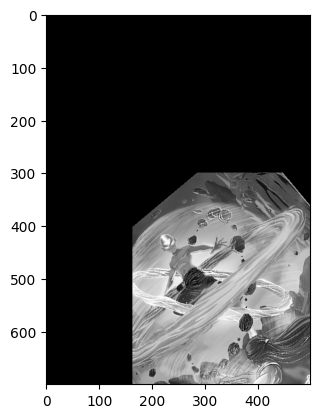

In [ ]:
pencerminan_y = np.zeros((height, width)).astype(int)
for i in range(translasi.shape[0]):
    for j in range(translasi.shape[1]):
        pencerminan_y[i][width-1-j] = translasi[i][j]
pencerminan_y
plt.imshow(pencerminan_y, cmap="gray")

### Melakukan Dilatasi = Skala 3

Proses dilatasi skala pada citra hasil pencerminan terhadap sumbu y dilakukan dengan mengiterasi setiap piksel dalam citra hasil pencerminan dan memindahkannya ke blok 3x3 yang bersesuaian dalam citra hasil dilatasi skala. Setelah selesai, citra hasil dilatasi skala ditampilkan menggunakan plt.imshow() dengan peta warna gray.

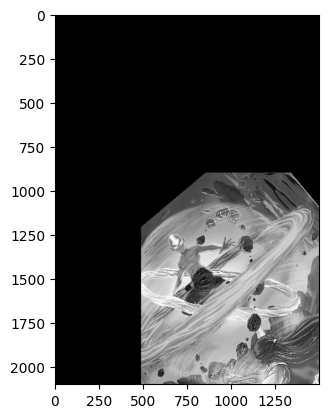

In [ ]:
dilatasi_skala = np.zeros((height*3, width*3)).astype(int)
for i in range(pencerminan_y.shape[0]):
    for j in range(pencerminan_y.shape[1]):
        dilatasi_skala[i*3:i*3+3, j*3:j*3+3] = pencerminan_y[i, j]
plt.imshow(dilatasi_skala, cmap="gray")